In [1]:
import pandas as pd

# Load the data
file_path = r"household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Preview the data
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
import pandas as pd

# Step 1: Load the dataset
file_path = "household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Step 2: Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Step 3: Convert relevant columns to float
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 4: Create 'Datetime' column from 'Date' and 'Time'
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Step 5: Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Step 6: Drop original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Step 7: Drop rows with missing values
df.dropna(inplace=True)

# Step 8: Final check
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00         

In [3]:
df.to_csv("household_power_data.csv")

In [5]:
import pandas as pd

df = pd.read_csv('household_power_data.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [6]:
df_filled = df.fillna(method='ffill').fillna(method='bfill')

C:\Users\Manigandan.N\AppData\Local\Temp\ipykernel_3972\1356426984.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill').fillna(method='bfill')


In [7]:
df_filled['Year'] = df_filled['Datetime'].dt.year
df_filled['Month'] = df_filled['Datetime'].dt.month
df_filled['Day'] = df_filled['Datetime'].dt.day
df_filled['Hour'] = df_filled['Datetime'].dt.hour
df_filled['Weekday'] = df_filled['Datetime'].dt.day_name()

In [8]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


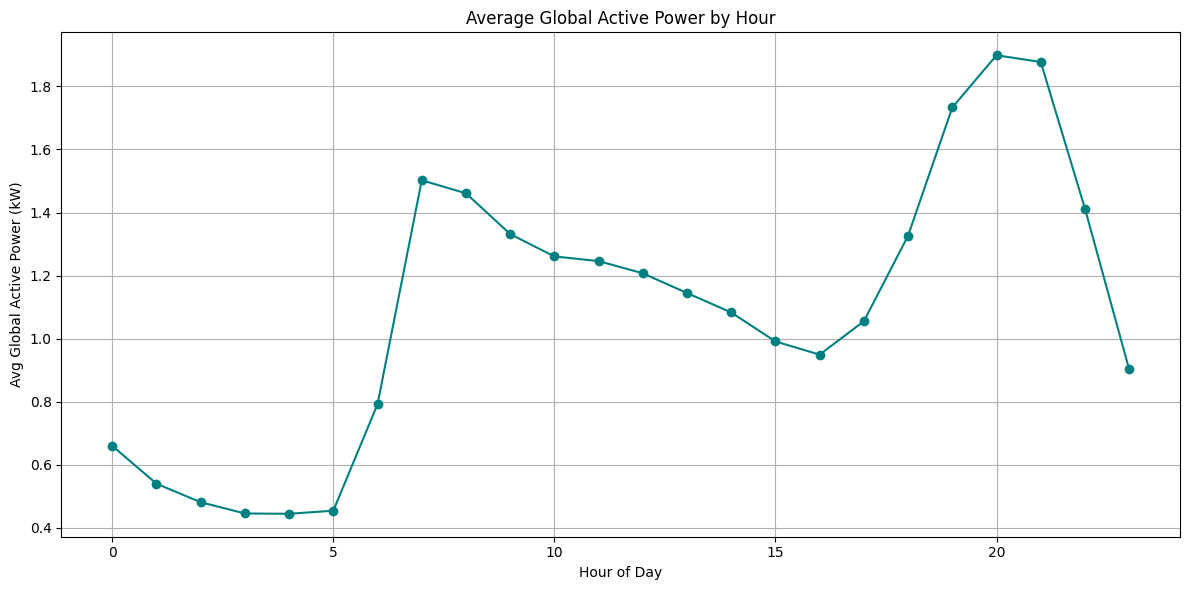

In [9]:
import matplotlib.pyplot as plt

hourly_avg = df_filled.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(12,6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', color='teal')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()

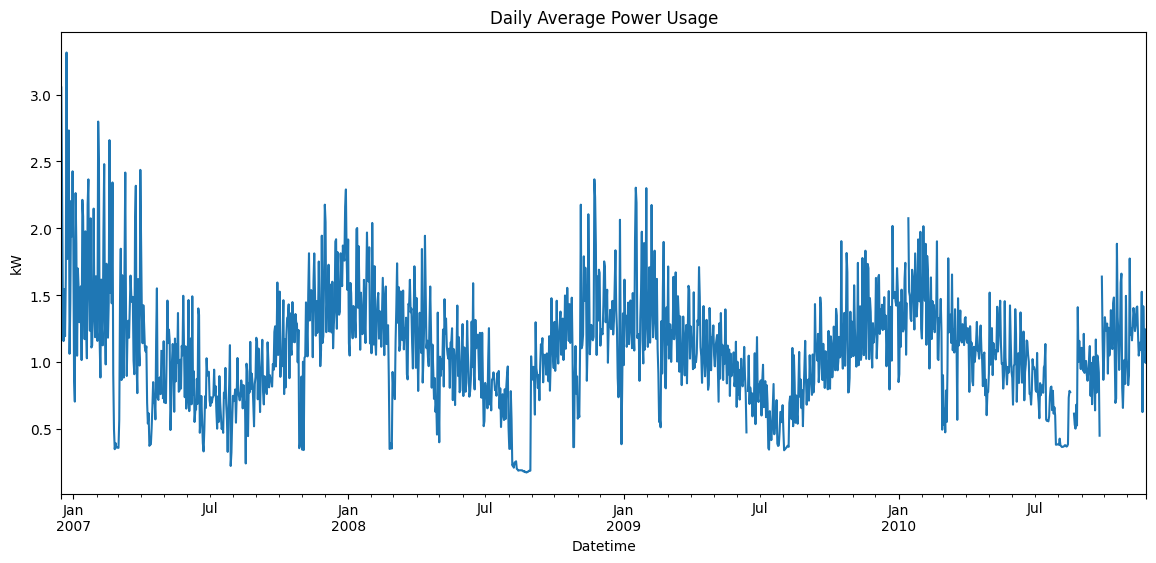

In [10]:
df_filled.set_index('Datetime')['Global_active_power'].resample('D').mean().plot(figsize=(14,6), title='Daily Average Power Usage', ylabel='kW')
plt.show()

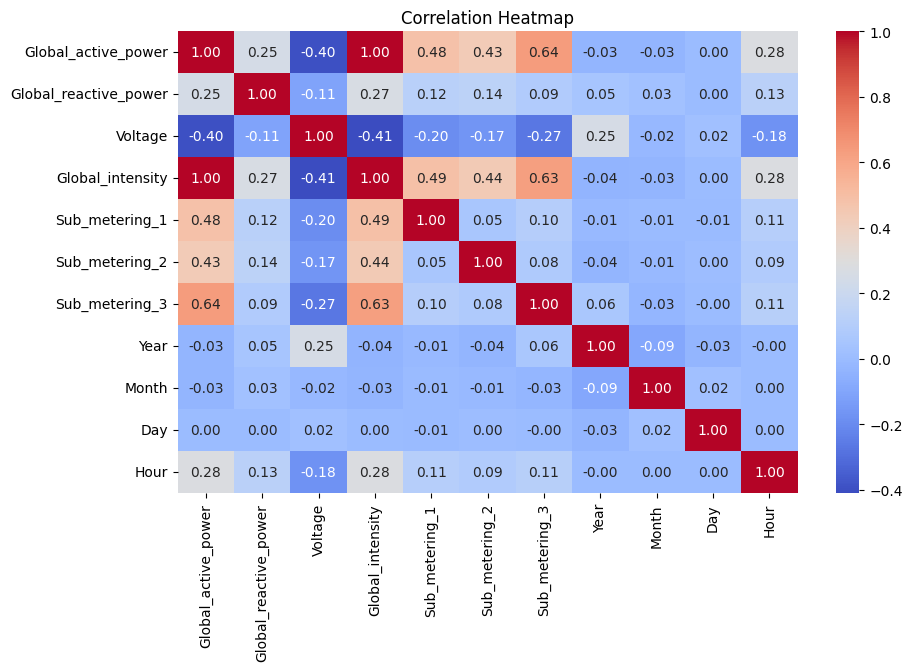

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_filled.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

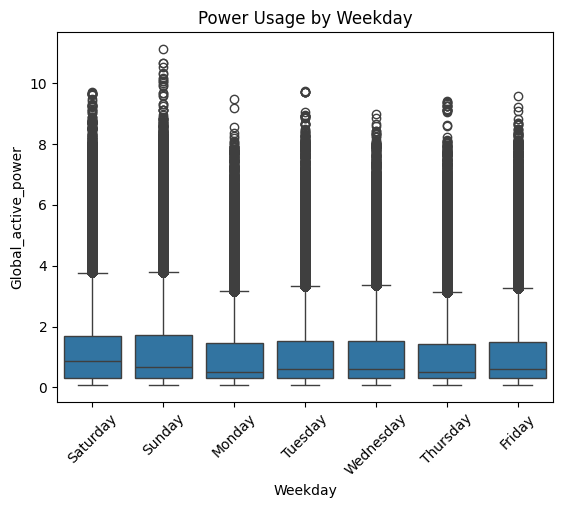

In [12]:
sns.boxplot(x='Weekday', y='Global_active_power', data=df_filled)
plt.xticks(rotation=45)
plt.title('Power Usage by Weekday')
plt.show()

In [14]:
import pandas as pd

df = pd.read_csv("household_power_data.csv")  # Replace with your file
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.dtypes)
df.head()

Shape: (2049280, 8)
Columns: ['Datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Datetime                  object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [16]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percent


In [17]:
df_cleaned = df.dropna()
print("New shape after dropna:", df_cleaned.shape)

New shape after dropna: (2049280, 8)


In [18]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [19]:
df.describe(include='object')

,Datetime
count,2049280
unique,2049280
top,2010-11-26 20:23:00
freq,1


In [20]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [21]:
for col in df.select_dtypes(include='object'):
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()

--- Datetime ---
Datetime
2010-11-26 20:23:00    1
2010-11-26 20:24:00    1
2010-11-26 20:25:00    1
2010-11-26 20:26:00    1
2010-11-26 20:27:00    1
                      ..
2006-12-16 17:27:00    1
2006-12-16 17:28:00    1
2006-12-16 17:29:00    1
2006-12-16 17:30:00    1
2006-12-16 17:31:00    1
Name: count, Length: 2049280, dtype: int64



In [ ]:
import numpy as np  

numeric_data = df.select_dtypes(include=[np.number])

# Skewness and Kurtosis
print("Skewness:\n", numeric_data.skew())
print("\nKurtosis:\n", numeric_data.kurt())

Skewness:
 Global_active_power      1.786233
Global_reactive_power    1.261914
Voltage                 -0.326665
Global_intensity         1.849100
Sub_metering_1           5.944541
Sub_metering_2           7.090553
Sub_metering_3           0.724688
dtype: float64

Kurtosis:
 Global_active_power       4.218685
Global_reactive_power     2.605633
Voltage                   0.724707
Global_intensity          4.601243
Sub_metering_1           35.642993
Sub_metering_2           57.907344
Sub_metering_3           -1.282198
dtype: float64


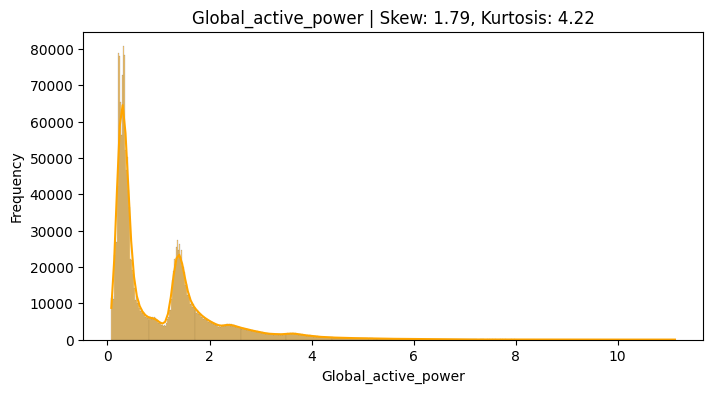

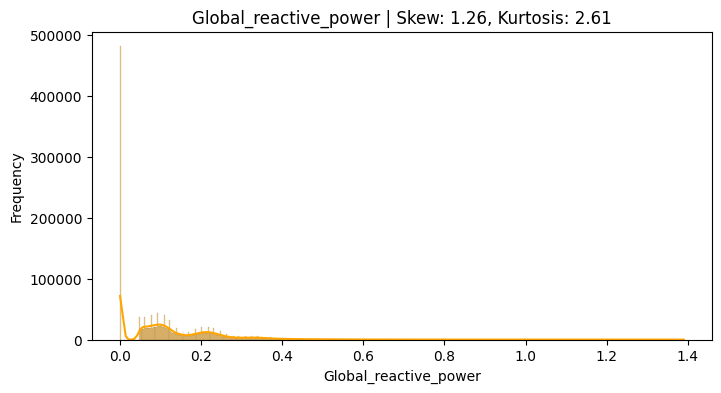

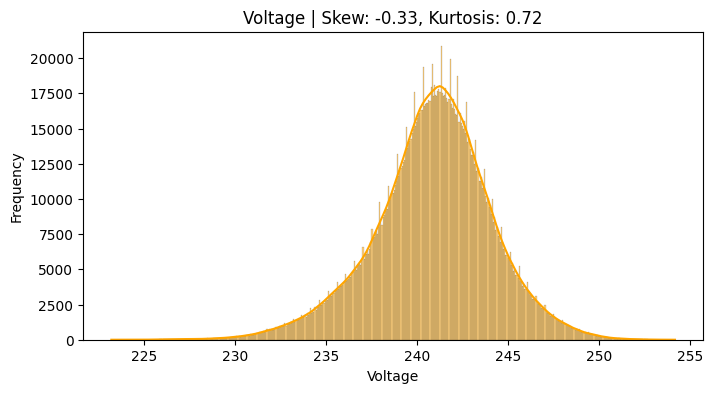

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("household_power_data.csv")  # Replace with actual file path
features = ['Global_active_power', 'Global_reactive_power', 'Voltage']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature], kde=True, color='orange')
    plt.title(f'{feature} | Skew: {data[feature].skew():.2f}, Kurtosis: {data[feature].kurt():.2f}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [28]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    return outliers

for col in df.select_dtypes(include=['float64', 'int64']):
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

Global_active_power: 94907 outliers
Global_reactive_power: 40420 outliers
Voltage: 51067 outliers
Global_intensity: 100961 outliers
Sub_metering_1: 169105 outliers
Sub_metering_2: 77151 outliers
Sub_metering_3: 0 outliers


In [29]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.44

In [30]:
# Example: Average numeric value by a category (replace as needed)
if 'CategoryColumn' in df.columns:
    print(df.groupby('CategoryColumn').mean(numeric_only=True))

In [31]:
if 'date' in df.columns or 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.day_name()
    print(df[['Date', 'Year', 'Month', 'DayOfWeek']].head())

In [ ]:
df['RollingAvg_7days'] = df['Global_active_power'].rolling(window=7).mean()  # Example of a 7-day rolling average

In [33]:
household_power_data = pd.read_csv('household_power_data.csv')
df = pd.merge(df, household_power_data, on='Datetime', how='left')

In [34]:
print(df.columns)

Index(['Datetime', 'Global_active_power_x', 'Global_reactive_power_x',
       'Voltage_x', 'Global_intensity_x', 'Sub_metering_1_x',
       'Sub_metering_2_x', 'Sub_metering_3_x', 'RollingAvg_7days',
       'Global_active_power_y', 'Global_reactive_power_y', 'Voltage_y',
       'Global_intensity_y', 'Sub_metering_1_y', 'Sub_metering_2_y',
       'Sub_metering_3_y'],
      dtype='object')


In [35]:
print(df.head())

              Datetime  Global_active_power_x  Global_reactive_power_x  \
0  2006-12-16 17:24:00                  4.216                    0.418   
1  2006-12-16 17:25:00                  5.360                    0.436   
2  2006-12-16 17:26:00                  5.374                    0.498   
3  2006-12-16 17:27:00                  5.388                    0.502   
4  2006-12-16 17:28:00                  3.666                    0.528   

   Voltage_x  Global_intensity_x  Sub_metering_1_x  Sub_metering_2_x  \
0     234.84                18.4               0.0               1.0   
1     233.63                23.0               0.0               1.0   
2     233.29                23.0               0.0               2.0   
3     233.74                23.0               0.0               1.0   
4     235.68                15.8               0.0               1.0   

   Sub_metering_3_x  RollingAvg_7days  Global_active_power_y  \
0              17.0               NaN                  4.2

In [36]:
# Use the '_x' version of the columns

df = df.rename(columns={
    'Global_active_power_x': 'Global_active_power',
    'Global_reactive_power_x': 'Global_reactive_power',
    'Voltage_x': 'Voltage',
    'Global_intensity_x': 'Global_intensity',
    'Sub_metering_1_x': 'Sub_metering_1',
    'Sub_metering_2_x': 'Sub_metering_2',
    'Sub_metering_3_x': 'Sub_metering_3'
})

In [37]:
X = df.drop(columns=['Global_active_power', 'Datetime'])  # Features
y = df['Global_active_power']  # Target variable

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
# Drop rows with NaN values in features or target
df_clean = df.dropna()

# Redefine X and y
X = df_clean.drop(columns=['Global_active_power', 'Datetime'])
y = df_clean['Global_active_power']

In [40]:
from sklearn.impute import SimpleImputer

# Define your features and target
X = df.drop(columns=['Global_active_power', 'Datetime'])
y = df['Global_active_power']

# Fill missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [41]:
# Drop rows where y (target) is NaN
df_clean = df.dropna(subset=['Global_active_power'])

# Define X and y again from the cleaned DataFrame
X = df_clean.drop(columns=['Global_active_power', 'Datetime'])
y = df_clean['Global_active_power']

# Impute missing values in X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now you can fit the model
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_imputed, y)

LinearRegression()

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from numpy import sqrt

# Load dataset
df = pd.read_csv("household_power_data.csv")

# Set the target column
target_column = 'Global_active_power'

# Drop rows where target is missing
df = df.dropna(subset=[target_column])

# Sample 100,000 rows for performance
df_sampled = df.sample(n=100_000, random_state=42)

# Drop the datetime column and separate features/target
X = df_sampled.drop(columns=[target_column, 'Datetime'], errors='ignore')
y = df_sampled[target_column]

# Handle any remaining non-numeric data
X = pd.get_dummies(X, drop_first=True)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test_scaled)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("📈 Linear Regression Performance (on 100k sample):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


📈 Linear Regression Performance (on 100k sample):
RMSE: 0.0403
MAE: 0.0258
R-squared: 0.9985


In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Load dataset
df = pd.read_csv("household_power_data.csv")

# Define target column
target_column = 'Global_active_power'

# Drop rows with missing target
df = df.dropna(subset=[target_column])

# Sample 100,000 rows to manage memory
df_sampled = df.sample(n=100_000, random_state=42)

# Drop datetime if present and separate features/target
X = df_sampled.drop(columns=[target_column, 'Datetime'], errors='ignore')
y = df_sampled[target_column]

# Convert categorical to numeric if needed
X = pd.get_dummies(X, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf.predict(X_test_scaled)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Output
print(f"🌲 Random Forest Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")


🌲 Random Forest Performance:
RMSE: 0.0352
MAE: 0.0204
R-squared: 0.9989


In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("household_power_data.csv")

# Define target
target_column = 'Global_active_power'

# Drop missing target values
df = df.dropna(subset=[target_column])

# Sample 100,000 rows to manage memory
df_sampled = df.sample(n=100_000, random_state=42)

# Prepare features and target
X = df_sampled.drop(columns=[target_column, 'Datetime'], errors='ignore')
y = df_sampled[target_column]

# Convert categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Output results
print("🌟 Gradient Boosting Performance:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")


🌟 Gradient Boosting Performance:
RMSE: 0.0347
MAE: 0.0216
R-squared: 0.9989


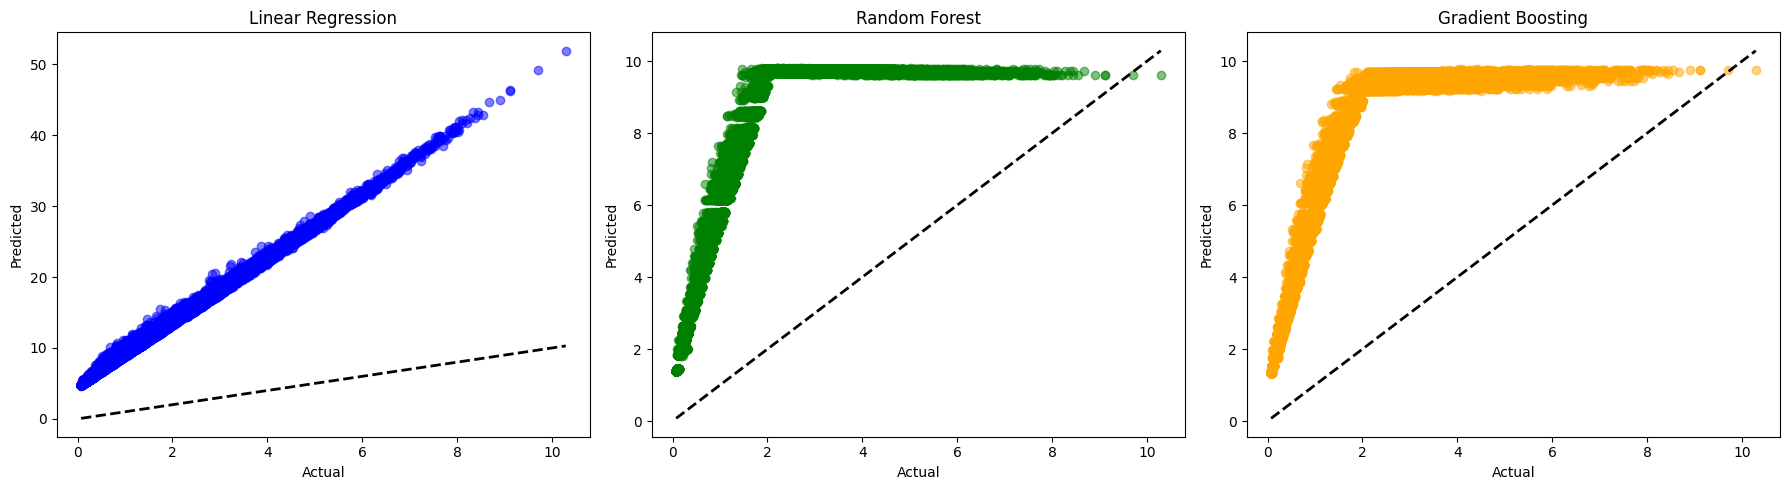

In [52]:
import matplotlib.pyplot as plt

# Predictions
y_pred_lr = lr.predict(X_imputed)
y_pred_rf = rf.predict(X_imputed)
y_pred_gb = gb.predict(X_imputed)

# Plotting
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y, y_pred_rf, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest")

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y, y_pred_gb, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting")

plt.tight_layout()
plt.show()


In [53]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(lr1,f)

In [55]:
# Save this in a separate file or run once in a notebook
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pickle

df = pd.read_csv("household_power_data.csv")
df = df.select_dtypes(include=[np.number])
df = df.dropna(subset=["Global_active_power"])

X = df.drop("Global_active_power", axis=1)
y = df["Global_active_power"]

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

model = LinearRegression()
model.fit(X_imputed, y)

# Save both model and imputer
with open("model.pkl", "wb") as f:
    pickle.dump((model, imputer, list(X.columns)), f)

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Sample data: replace with your dataset
# X = features, y = target variable
# For example:
# X, y = your_data.drop('target', axis=1), your_data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [5, 10],           # number of trees
    'max_depth': [None, 2, 4, 6]         # max depth of trees
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                # 5-fold cross-validation
                           n_jobs=-1,           # use all processors
                           scoring='neg_mean_squared_error',
                           verbose=2)

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate on test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'max_depth': None, 'n_estimators': 10}
Test MSE: 0.0011
